In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Exploração e análise de dados de crédito com SQL**

Projeto final do curso SQL - EBAC

# **Os dados:**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de crédito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi elaborada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em:

 https://github.com/andre-marcos-perez/ebac-course-utils



# **Exploração de dados:**

De início,vamos análiser os dados disponíveis no arquivo:

**Qual a quantidade de informações temos na nossa base de dados?**

**Query:** SELECT count (*) FROM credito 

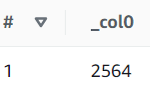

**ps.:** A base de dados do link acima contém mais linhas do que a seleção utilizada. Você pode utilizar todas as linhas ou considerar apenas uma fração dos dados. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites computacionais e financeiros na qual a redução de dados para análise para fins de estudo se torna interessante.

**Quais os tipos de cada dado?**

**Query:**  DESCRIBE clientes


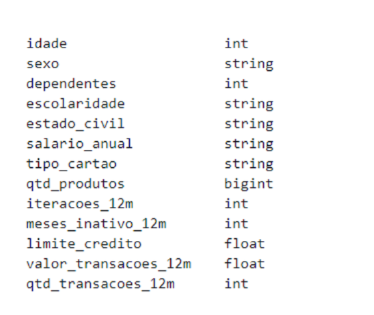

Com base nos tipos de dados que temos, vamos prosseguir com as nossas análises

**Como são os nossos dados**

**Query:** SELECT * FROM credito LIMIT 10;

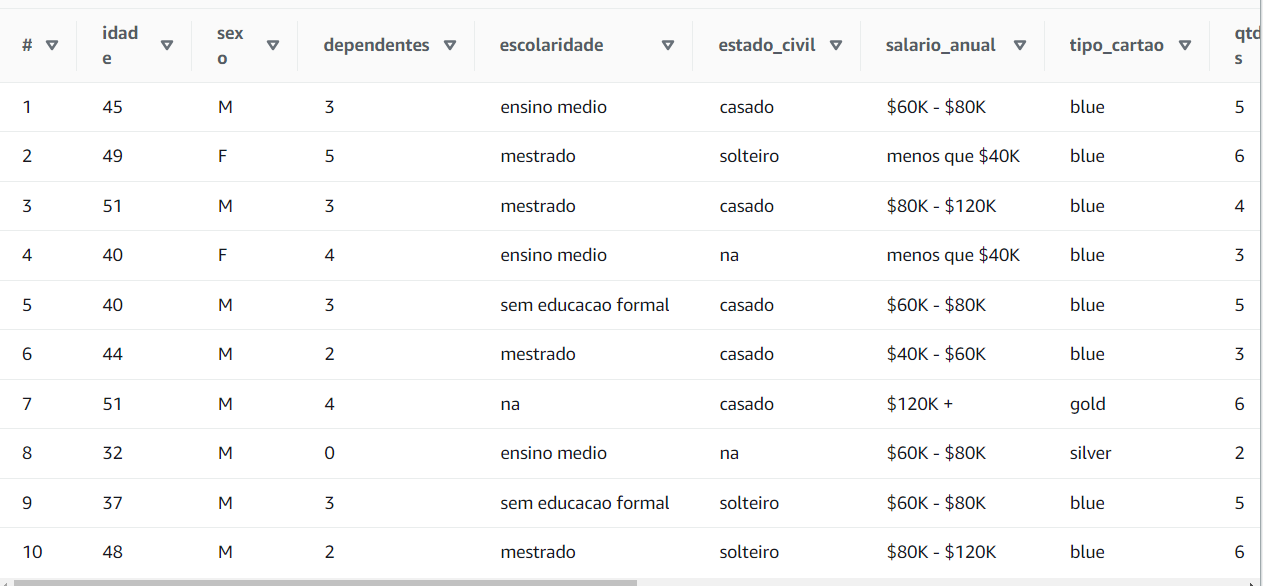

Obs.: É possível verificar informações nulas (na) em nossa tabela de dados.

**Quais são os tipos de escolaridade disponíveis no dataset?**

**Query:**  SELECT DISTINCT escolaridade FROM credito

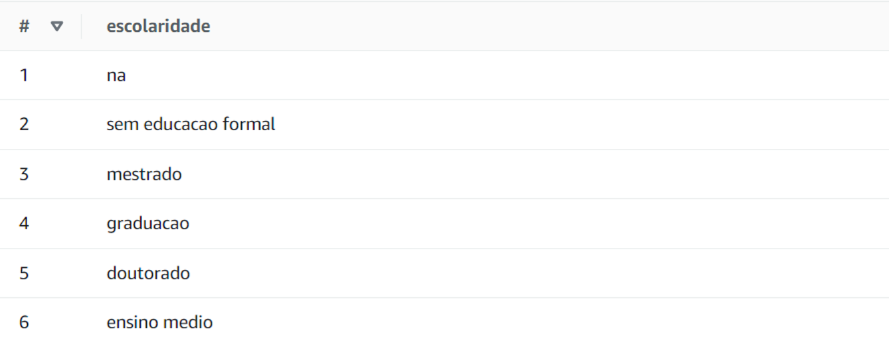

**Quais são os tipos de estado_civil disponíveis no dataset?**

**Query:** SELECT DISTINCT estado_civil FROM clientes

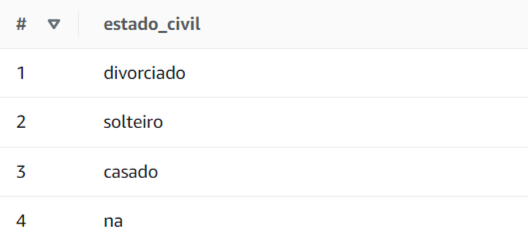

**Quais são os tipos de salario_anual disponíveis no dataset?**

**Query:** SELECT DISTINCT salario_anual FROM clientes

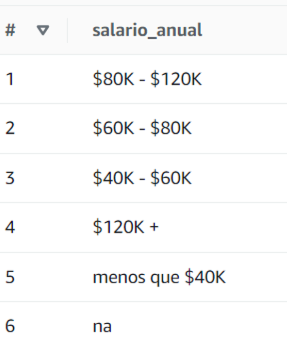

**Quais são os tipos de cartão disponíveis no dataset?**

obs: podemos observar que há valores nulos (na) nas escolaridades.

**Query:**  SELECT DISTINCT tipo_cartao FROM clientes

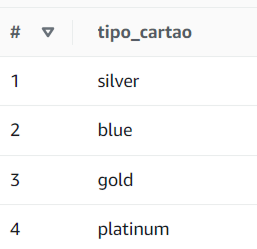

**Qual o tipo de cartão mais utilizado pelos clientes?**

**Query:** select
distinct tipo_cartao,
count(*) as quantidade
from credito
group by tipo_cartao
order by quantidade desc

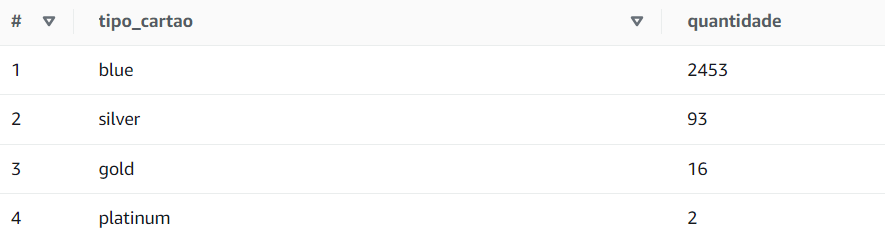

**Análise de dados**

* **Q1:** Nesse banco de dados, quantos clientes temos de cada faixa salarial?
* **Q2:** Nesse banco de dados, quantos clientes são homens e quantos são mulheres?
* **Q3:** Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?
* **Q4:**  Qual a maior e menor transação dos clientes?
* **Q5:** Quais as características dos clientes que possuem os maiores creditos?
* **Q6:** Quais as características dos clientes que possuem os menores creditos?
* **Q7:** Será que as mulheres gastam mais?
* **Q8:**  O salário impacta no limite?


**Q1:**  Nesse banco de dados, quantos clientes temos de cada faixa salarial?

**Query:** select count(*), salario_anual from credito group by salario_anual

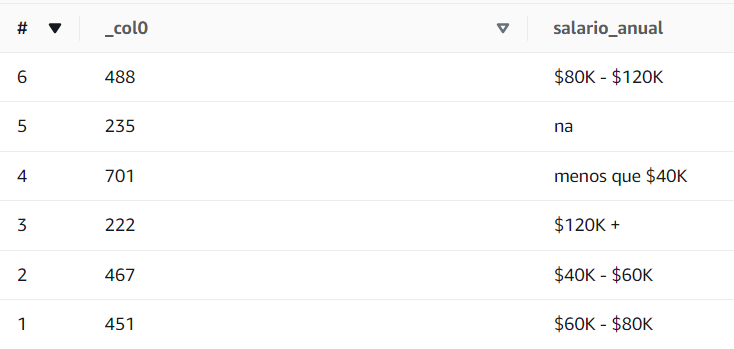

**Q2:** Nesse banco de dados, quantos clientes são homens e quantos são mulheres?

**Query:** select count(*), sexo from credito group by sexo

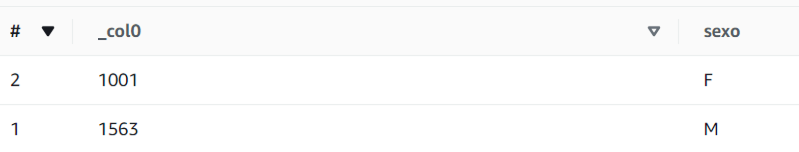

Segue informações gráficas:

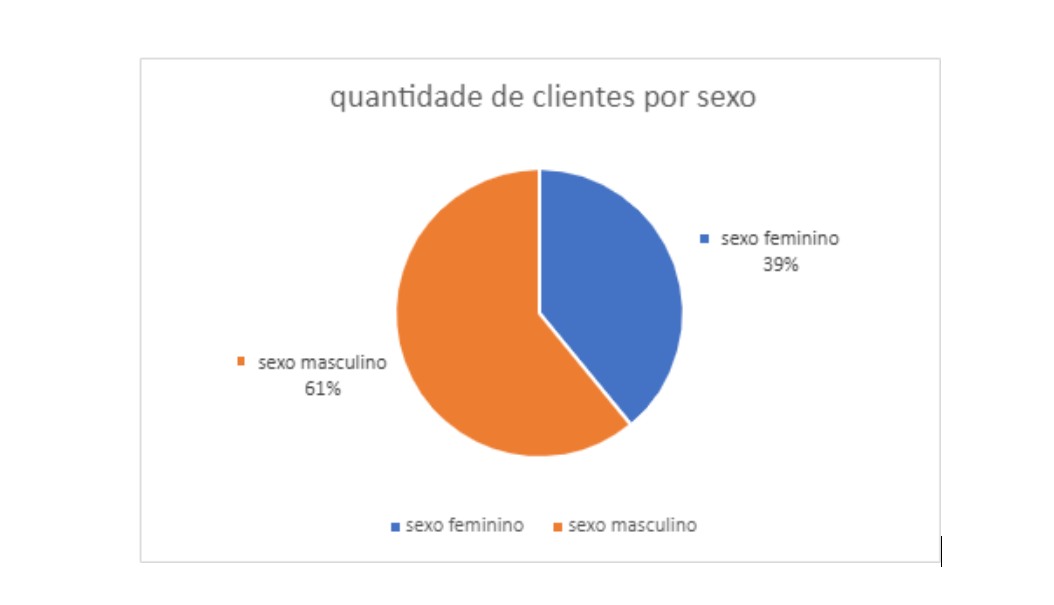

**Q3:** Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?

**Query:**  select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo

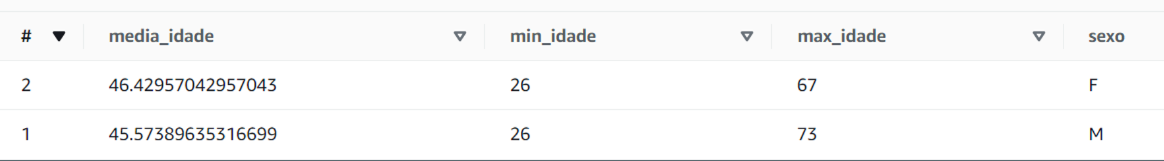

**Q4:** Qual a maior e menor transação dos clientes?

**Query:** select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito

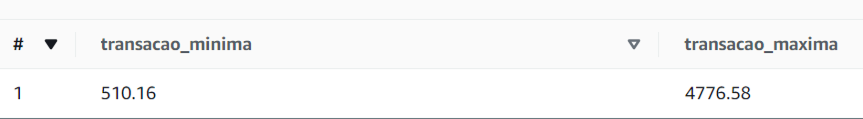

Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 5776.58

**Q5:** Quais as características dos clientes que possuem os maiores creditos?

**Query:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

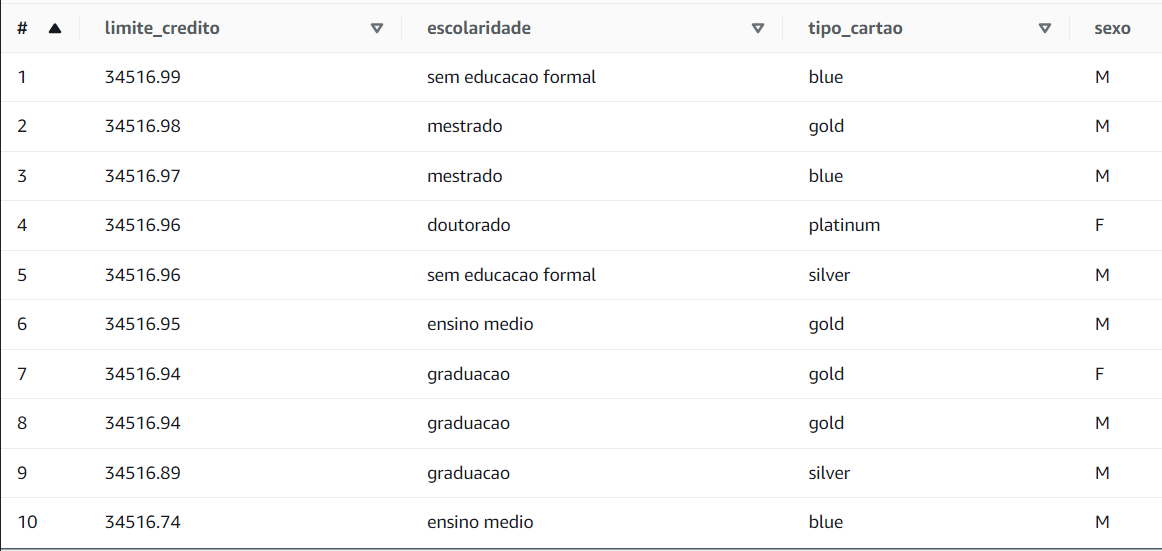

Não parece haver um impacto da escolaridade no limite. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

**Q6:** Quais as características dos clientes que possuem os menores creditos?

**Query:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc

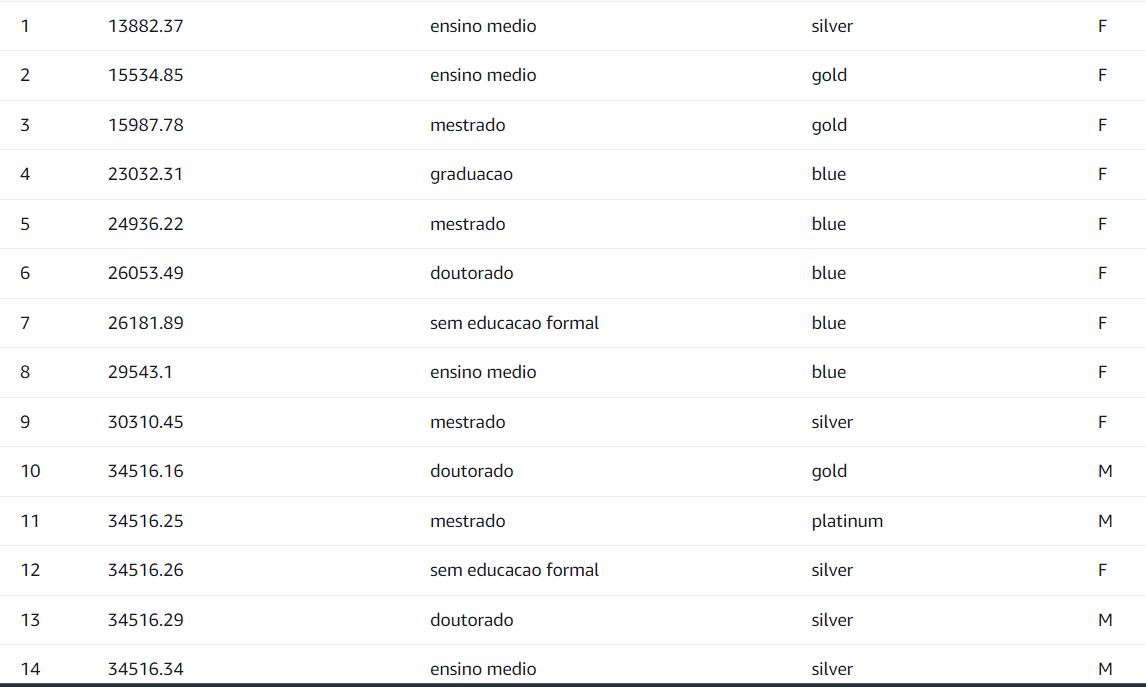

**Q7:** Será que as mulheres gastam mais?

**Query:** select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

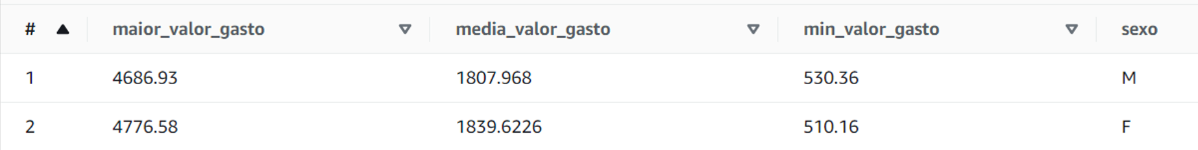

Apesar da diferença nos limites, os gastos de homens e mulheres são similares!

**Q8:** O salário impacta no limite?

**Query:** select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from clientes where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

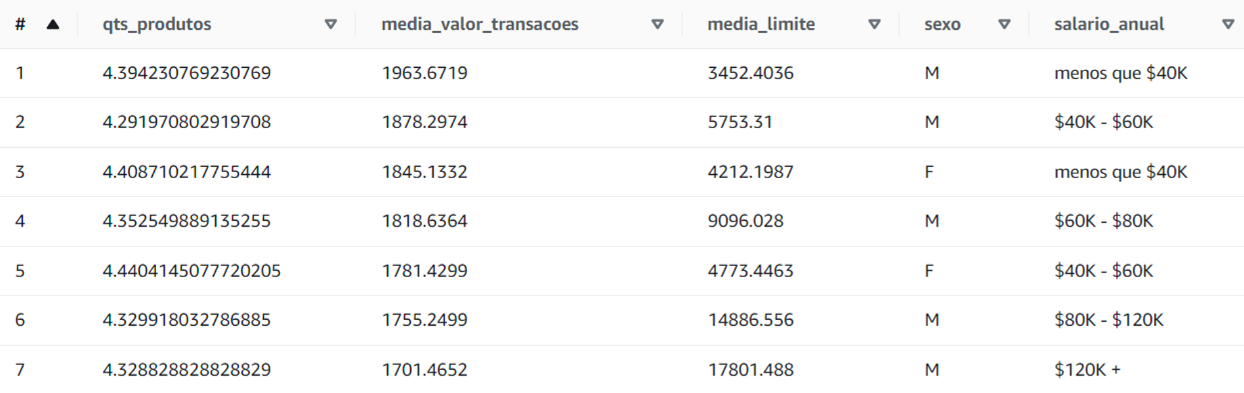

SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito!

# **Conclusões**

* Conforme visualizado em nossa base de dados, não temos as informações sobre o Ano de sua coleta ou a Região onde esses clientes moram.
* Ao analisarmos a faixa salarial informada pelos clientes temos 27% informando receber menos que 40K. Seguindo com 9% informar receber na faixa de 120K. Ao analisamos os dados nulos (na) verificamos que 9% dos clientes não entraram em nenhuma faixa salarial.
* A base de dados possuem o maior volume de clientes do sexo Masculino (M) cerca de 61% dos clientes. Com apenas 39% da clientela é do sexo Feminino (F)
* A média de idade da nossa base de clientes é de 46 anos para clientes do sexo Feminino e 45 para o sexo Masculino.
* Quanto ao tipo de cartão oferecido temos as classificações nos seguintes tipos: blue, gold, silver e platinum. Essas categorias leva em consideração a faixas salariais. Sendo possível observar que os maiores limites de crédito está disponível para o sexo Masculino. Quanto ao sexo feminino é possível analisarmos que possuem menor crédito em relação a faixa para o Masculino.

Segue informações gráficas:


Segue informações gráficas:
